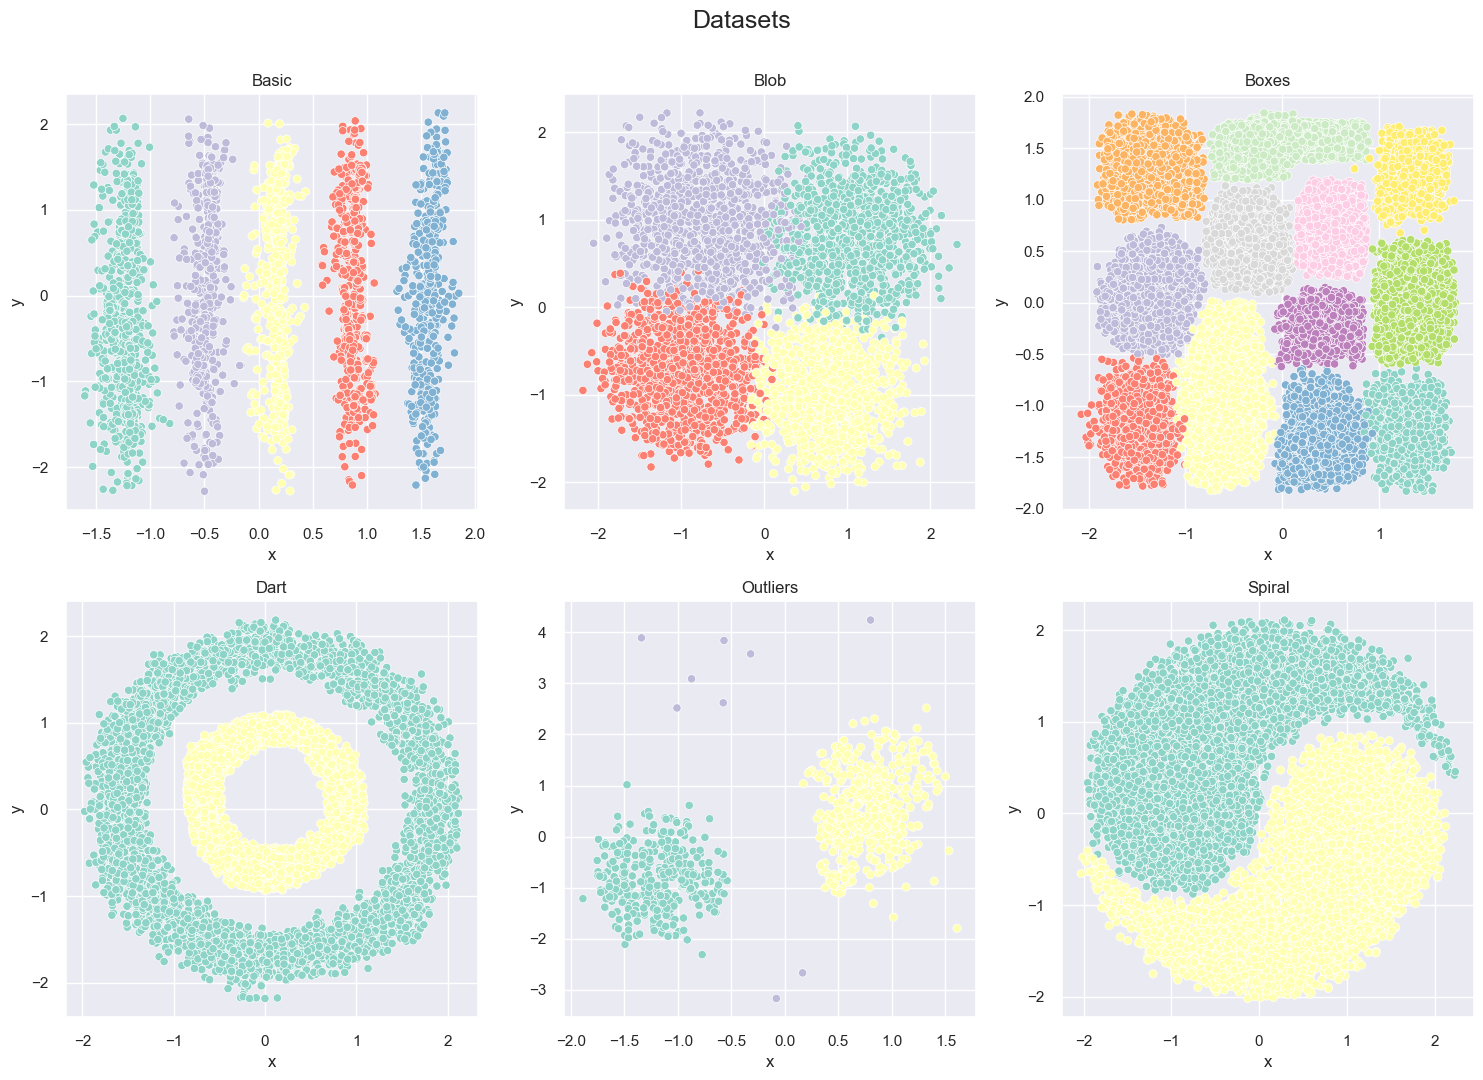

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
import kmedoids
from yellowbrick.cluster import KElbowVisualizer

sns.set_theme()
sns.set_palette("Set3")

preprocessor = ColumnTransformer([("scaler", StandardScaler(), ["x", "y"])], remainder='passthrough', verbose_feature_names_out=False)

data1 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("Datos/data/data1.csv")), columns=preprocessor.get_feature_names_out())
data2 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("Datos/data/data2.csv")), columns=preprocessor.get_feature_names_out())
data3 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("Datos/data/data3.csv")), columns=preprocessor.get_feature_names_out())
data4 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("Datos/data/data4.csv")), columns=preprocessor.get_feature_names_out())
data5 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("Datos/data/data5.csv")), columns=preprocessor.get_feature_names_out())
data6 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("Datos/data/data6.csv")), columns=preprocessor.get_feature_names_out())

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,11))
fig.suptitle('Datasets\n', size = 18)

sns.scatterplot(data1, x="x", y="y", hue='color', palette='Set3', ax = axes[0,0], legend = False)
sns.scatterplot(data2, x="x", y="y", hue='color', palette='Set3', ax = axes[0,1], legend = False)
sns.scatterplot(data3, x="x", y="y", hue='color', palette='Set3', ax = axes[0,2], legend = False)
sns.scatterplot(data4, x="x", y="y", hue='color', palette='Set3', ax = axes[1,0], legend = False)
sns.scatterplot(data5, x="x", y="y", hue='color', palette='Set3', ax = axes[1,1], legend = False)
sns.scatterplot(data6, x="x", y="y", hue='color', palette='Set3', ax = axes[1,2], legend = False)

axes[0,0].set_title("Basic");
axes[0,1].set_title("Blob");
axes[0,2].set_title("Boxes");
axes[1,0].set_title("Dart");
axes[1,1].set_title("Outliers");
axes[1,2].set_title("Spiral");

plt.tight_layout()

### 1. Adestra un kmeans con 4 clusteres para data2 (random state=42). Cal e o Silhouette score medio (con 3 decimais)?  

For 4 clusters the average Silhouette score is 0.4720


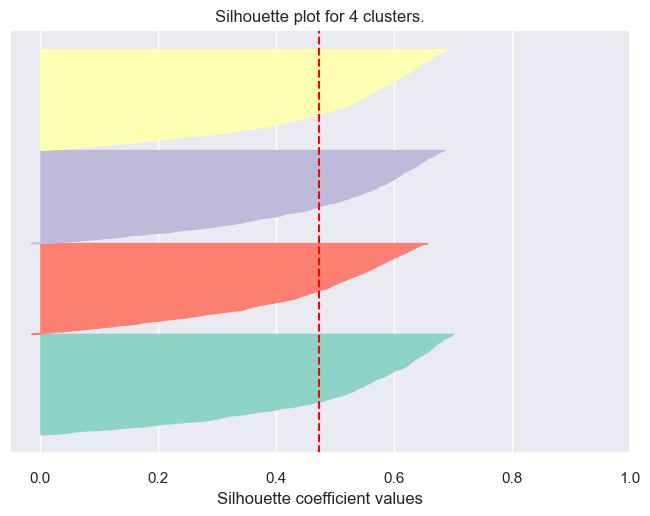

In [6]:
from sklearn.cluster import KMeans

k_4_means = KMeans(n_clusters=4, random_state=42).fit(data2[['x', 'y']])
data2['4-means'] = k_4_means.labels_

from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(data2[['x', 'y']], data2['4-means'])
silhouette_values = silhouette_samples(data2[['x', 'y']], data2['4-means'])

print(f'For 4 clusters the average Silhouette score is {silhouette_avg:.4f}')

y_lower = 0

for cluster in data2['4-means'].unique():
    cluster_silhouette_values = silhouette_values[data2['4-means'] == cluster]
    cluster_silhouette_values.sort()

    plt.fill_betweenx(np.arange(y_lower, y_lower + len(cluster_silhouette_values)), cluster_silhouette_values, color=f"C{cluster}")
    y_lower = y_lower + len(cluster_silhouette_values)

plt.title("Silhouette plot for 4 clusters.")
plt.xlabel("Silhouette coefficient values")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


### 2. É posible que o agrupamento da imaxe sexa o resultado da execución dun algoritmo kmeans?

<img src="kmean.png" width="400" alt="Ejemplo de clustering">

Si, se os datos teñen máis de 2 dimensións

### 3. A puntuación de Silhouette ten en conta unicamente as distancias intracluster.

Falso

### 4. Cal e a distancia de Chebyshev media entre as 10 primeiras observacions do ficheiro "data1.pdf" (con 3 decimais)

In [20]:
from scipy.spatial.distance import pdist, squareform

sample = data1.iloc[0:10][["x", "y"]]
chebyshev_distances_matrix = squareform(pdist(sample, metric="chebyshev"))

print(f"La distancia de Chebyshev media es: {np.mean(chebyshev_distances_matrix):.3f}")

La distancia de Chebyshev media es: 1.143


### 5. DBSCAN e HDBSCAN son algoritmos de agrupamento baseados en particionado

Falso

### 6. Emparella as opcions correctas

- kmeans: asigna cada punto ao centroide mais cercano
- aglomerativo: permite obtener el numero de clusteres que deseemos cortando el arbol a una altura determinada
- dbscan: agrupa os datos por densidade
- kmedoids: usa como medoides puntos presentes no dataset

### 7. Executa un kmeans sobre o dataset data2 empregando 4 clusters (random state=42). Cantas observacions hai no cluster 2?

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(data2[['x', 'y']])

data2['cluster'] = kmeans.labels_
obs_cluster_2 = (data2['cluster'] == 2).sum()

print(f"Observaciones en el cluster 2: {obs_cluster_2}")

Observaciones en el cluster 2: 988


### 8. Executa un kmediods sobre o dataset2, con 4 clusters, empregando a distancia euclidea e o random state=42. Que indice ocupa a observación do medoide 0?



In [ ]:
import kmedoids

k_4_medoids = kmedoids.KMedoids(n_clusters=4, random_state=42, metric="euclidean")
k_4_medoids.fit(data2[['x', 'y']].to_numpy())

medoid_0 = k_4_medoids.cluster_centers_[0]

idx_medoid_0 = np.where((data2[['x', 'y']].to_numpy() == medoid_0).all(axis=1))[0][0]

print(f"El índice de la observación-medoide 0 es: {idx_medoid_0}")

El índice de la observación-medoide 0 es: 3036


### 9. O clustering aglomerativo con enlace Ward comeza con un único cluster e vai dividindoo ata chegar ás observacions individuais

Falso

### 10. Aplica o método do codo a un kmeans sobre o dataset data5 (random state=42)). Cal e o numero de clusteres optimo?

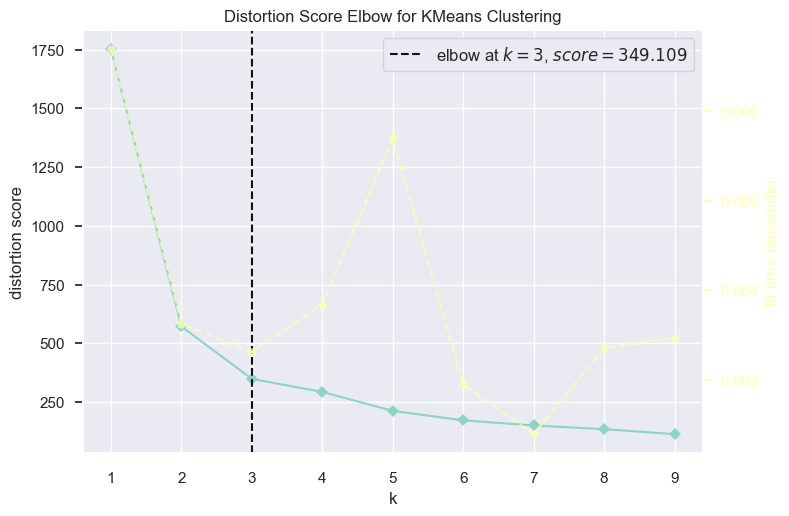

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 10))

visualizer.fit(data5[["x", "y"]])
visualizer.show()